## Radiation Dose Analysis

In [1]:
import context

from G4EPP import api, RadiationAnalysis

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

First, let's grab separate spectral profiles of the electrons and photons with the following attributes:

 - Flux: 10$^5$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$ 
 - Energy: exponentially distributed with E$_0$ = 100 keV 

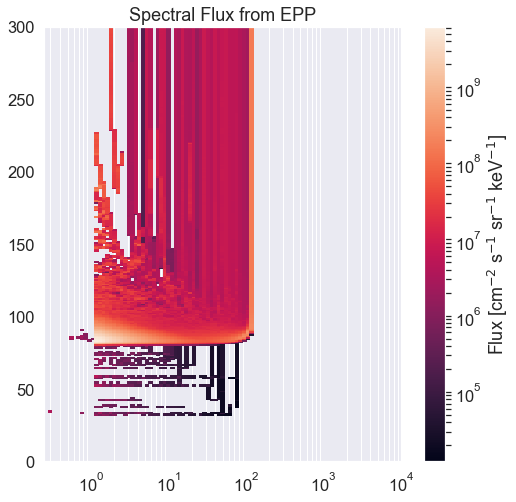

In [2]:
Api = api()

energyDist = "mono"
energy     = 100
flux       = 1e5

# Get the electron and photon profiles separately
prof_el, _ = Api.get_spectral_profile(energyDist, energy, flux, particle="electron")
prof_ph, _ = Api.get_spectral_profile(energyDist, energy, flux, particle="photon")

# Get meshgridded altitude-spectrum abscissa for plotting
X,Y = Api.get_spectral_abscissa()

# Plot specifics
plt.figure(figsize=(8,8)); plt.grid(True, which='both')

plt.pcolormesh(X, Y, prof_el + prof_ph, norm=LogNorm())

plt.colorbar(label='Flux [cm$^{-2}$ s$^{-1}$ sr$^{-1}$ keV$^{-1}$]')

plt.xscale('log')
plt.ylim(0, 300)
plt.title('Spectral Flux from EPP');

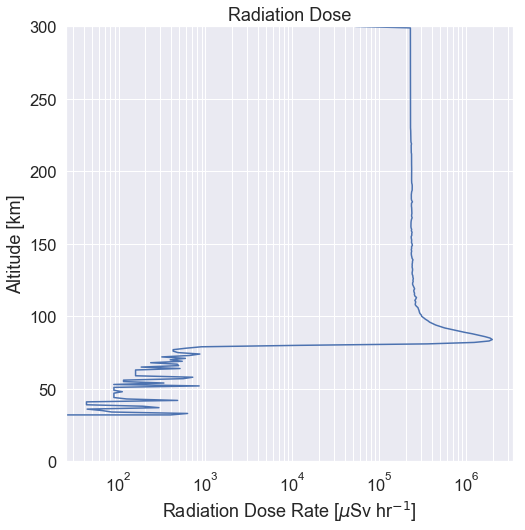

In [3]:
Rad = RadiationAnalysis(material='human')

# Convert Sv -> uSv and sec -> hr 
rad_profile = Rad.calculate_radiation_dose(prof_el, prof_ph) * 1e6 * 3600

plt.figure(figsize=(8,8)); plt.grid(True, which='both')

plt.plot(rad_profile , Api.get_altitude_array())

plt.xlabel('Radiation Dose Rate [$\mu$Sv hr$^{-1}$]')
plt.ylabel('Altitude [km]')
plt.xscale('log')
plt.ylim(0, 300)
plt.title('Radiation Dose');

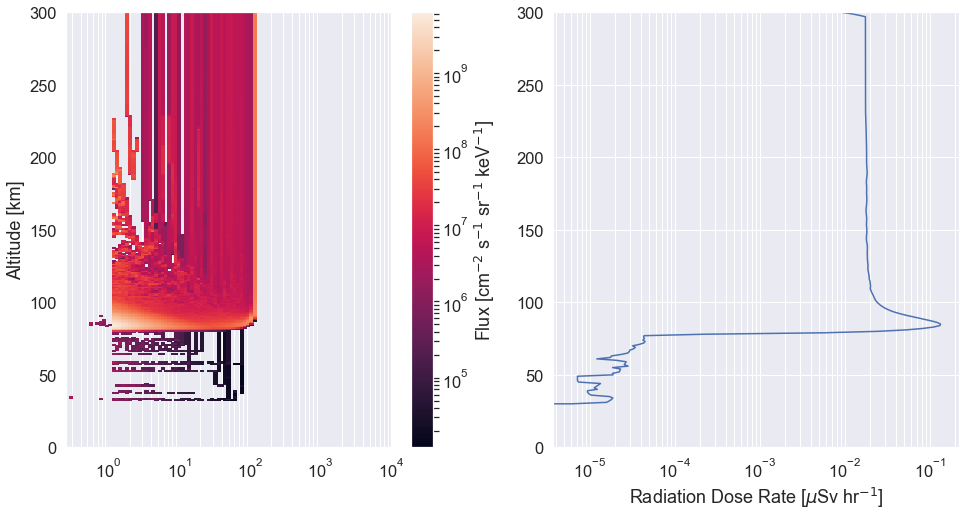

In [5]:
from scipy.signal import savgol_filter

energyDist = "mono"
energy     = 100

prof_el, _ = Api.get_spectral_profile(energyDist, energy, flux, "electron");
prof_ph, _ = Api.get_spectral_profile(energyDist, energy, flux, "photon");


rad_profile = Rad.calculate_radiation_dose(prof_el, prof_ph) * 1e6 * 3600


plt.figure(figsize=(16,8)); plt.subplot(1,2,1); plt.grid(True, which='both');

plt.pcolormesh(X, Y, prof_el + prof_ph, norm=LogNorm())

plt.colorbar(label='Flux [cm$^{-2}$ s$^{-1}$ sr$^{-1}$ keV$^{-1}$]');

plt.xscale('log');
plt.ylim(0, 300);
#plt.title('Spectral Flux from EPP');
plt.ylabel('Altitude [km]');

plt.subplot(1,2,2); plt.grid(True, which='both')

plt.plot(savgol_filter(rad_profile, 5, 1), Api.get_altitude_array());

plt.xlabel('Radiation Dose Rate [$\mu$Sv hr$^{-1}$]');
plt.xscale('log');
plt.ylim(0, 300);
#plt.title('Radiation Dose');